# 💡 MosaicPi_Guide: **"Mathematical Foundations for Explicitization — from Mathematics to Automated Machine Scientist Applications"**

> All code and examples are shared to help researchers, students, and engineers understand the reasoning behind DDDA — and to make it easy to apply dimensional analysis to your own data.  
> This notebook serves as an entry-level guide for teaching, validating physical models, and enabling domain-specific knowledge engineering through data-driven dimensional reasoning.

---

## 🎯 What You'll Learn

**隐函数最优显式化 - 机器科学家应用**

In this notebook, we will walk through the theoretical and computational foundation of **dimensional analysis**, with a focus on the **Buckingham Pi theorem**. You will learn:

1. **物理模型，隐函数，流形**  
   Understand why we reduce variables and how dimensional consistency enables model generalization.

2. **变量组合**  
   Encode physical units of input quantities using base units and build the D-matrix.

3. **变量组合评估**  
   Discover dimensionless groups by solving linear algebraic equations on the D-matrix.

4. **显式化策略可视化**  
   Learn to assess whether derived groups make physical and computational sense.

5. **不确定性定量化**  
   Set the stage for further steps in the DDDA pipeline including Pi-group selection, uncertainty quantification, and regime detection.

---

## 👤 Author

- **Name**: Jiashun Pang  
- **Created**: August 2025  
- **Affiliation**: DDDA Project, open research notebook  
- **Notebook Focus**:  
  A hands-on exploration of dimensional analysis — from aggregated raw quantities to symbolic Pi-group discovery and preparation for downstream DDDA tasks.

---

📌 *This notebook is designed to be accessible for learners new to dimensional analysis, while also laying the foundation for advanced applications in the full DDDA pipeline.*


---

# 1 · Implicit Function Theorem — General Multivariable Form & Geometric Interpretation

在物理建模中，由理论推导得到的方程往往体现为多个变量之间的复杂约束关系。
这些约束关系可以自然地被理解为一个 **高维流形（曲面或超曲面）**，其上所有的物理量组合都必须满足某种内在的平衡与守恒条件。

一个 **封闭的物理模型** 正是这种约束的数学表达形式。我们通常将其写作隐函数的形式：

$$
F(x_1, x_2, \dots, x_n) = 0,
$$

这里的 $F$ 可以包含守恒律、本构关系、边界条件等。

---

## 从隐函数到显函数

然而，如果我们想要**求解、预测或外推**这些关系，仅仅依赖隐函数形式是不够的。
隐函数只告诉我们“哪些解是允许的”，但没有明确给出“一个变量如何依赖于另一些变量”。

为此，我们需要使用 **隐函数定理**，在局部坐标系下，将隐函数关系转化为显函数：

$$
y = f(x_1, x_2, \dots, x_k),
$$

这种过程可以看作是对流形的一次“投影”，选择某些变量作为自变量，其余作为因变量。

---

## 显函数如同补丁

由于隐函数在全局往往无法唯一显式化（可能出现多解、分叉或奇异点），我们只能在局部区域中找到适用的显函数形式。
因此可以将每一个局部显函数看作是 **覆盖在隐函数曲面上的一个补丁（patch）**。

最终，通过在不同区域拼接多个补丁，我们便能够得到对整体物理模型的完整近似与表征。
这一思想正是本工作的核心：

> **利用显函数的分区化描述，将隐函数模型拼接为一个由补丁组成的马赛克结构，从而实现对物理规律的分块化表示。**

---

## 评估维度

为了实现这一目标，我们将在 notebook 中从以下几个角度对显函数的结构进行评估和判定：

* **可解性判定**：判断在给定区域内是否存在唯一的显函数解（Jacobian 的可逆性）。
* **稳定性判定**：分析解对输入扰动的稳定性（条件数与局部敏感度）。
* **敏感性判定**：评估各输入变量对结果的影响程度（Jacobian 的导数结构与误差传播）。

---

## 输入数据

在本 notebook 中，我们的输入分为两类：

1. **物理模型 (1.1)** — 由守恒律或理论推导得到的隐函数形式。
2. **实验/模拟数据 (1.2)** — 用于约束、验证和修正模型，帮助选择合适的显函数补丁。

---

👉 通过这一流程，我们将实现从 **物理模型（隐函数）** 出发，结合 **数据驱动的判定与验证**，最终得到一套分区化、补丁化的 **显函数拼贴结构**，为后续的外推与实验指导奠定基础。

---


## 1.1 物理模型

在 MosaicPi 中，物理模型作为一种 **先验约束** 被引入。最终的分析结果将在此先验的基础上进行拓展与迭代。

一个合格的物理模型需要满足以下基本要求：

* **封闭性**：模型中的未知量与方程数量匹配，能够自洽求解；
* **量纲齐次性**：所有方程在量纲上保持一致；
* **理论合理性**：模型来源于明确的物理推理或已知的守恒原理。

模型的获取方式可以是用户直接输入，也可以从已有的学科数据库中调用。

在进入 MosaicPi 的分析流程时，我们首先会对输入的物理模型进行 **无量纲化处理**，从而将其标准化为隐函数形式，便于后续的 **Jacobian 判定** 与 **分区显函数化**。

---

## 1.2 实验 / 模拟数据

在 MosaicPi 中，实验或数值模拟数据作为物理模型的补充，用于：

* 约束与验证显函数的局部形式；
* 在分区边界或奇异点附近提供额外的信息；
* 量化模型的不确定性，并为迭代更新提供依据。

数据需要满足的基本要求：

* **可匹配性**：数据中涉及的物理量应与输入模型中的变量一致，或能通过已知变换得到；
* **量纲一致性**：原始数据需附带清晰的物理单位，以便统一进行无量纲化处理；
* **充分性**：覆盖模型的主要变化范围，尤其是在敏感区域（Jacobian 接近退化处）；
* **置信度**：实验或模拟数据应提供测量误差或数值误差的估计，以便后续不确定性传播。

在进入流程时，所有数据会首先与物理模型保持一致地进行 **无量纲化**，然后与 Jacobian 分析结果结合，用于局部显函数拟合与分区判定。

---


## 1.3 示例

我们使用自制的**无空气阻力的抛体运动模型**在给定两条约束方程时的数据来进行**基点选择**与**可解性判定**的完整演示。

* 选自变量块：$x=(R,H)$（水平射程、最高点高度）
* 选因变量块：$y=(v_0,\theta)$（初速度、发射角）
* 约束（$k=2$ 条）：

### 1.3.1 物理模型
**运动学公式：**
  $$
  R = \frac{v_0^2\sin(2\theta)}{g}, \quad H = \frac{v_0^2\sin^2\theta}{2g}
  $$

将它们改写成**零等式形式：**
  $$
  \begin{aligned}
  F_1(x,y)&=R-\frac{v_0^2\sin(2\theta)}{g}=0,\\
  F_2(x,y)&=H-\frac{v_0^2\sin^2\theta}{2g}=0.
  \end{aligned}
  $$

  于是 $F:\mathbb{R}^2\times\mathbb{R}^2\to\mathbb{R}^2$。

---

接下来我们使用代码示例，使用sympy对模型进行符号化的输入。

其中

- R - 水平射程（R）
- H - 最高点高度（H）
- v0 - 初速度（$v_0$）
- th - 发射角（$\theta$）
- g - 重力

In [34]:
import sympy as sp
import numpy as np

R, H, v0, th, g = sp.symbols('R H v0 th g', real=True)
F1 = R - (v0**2)*sp.sin(2*th)/g
F2 = H - (v0**2)*(sp.sin(th)**2)/(2*g)
F = sp.Matrix([F1, F2])

print('F_1: ', F[0], '\nF_2: ', F[1])

F_1:  R - v0**2*sin(2*th)/g 
F_2:  H - v0**2*sin(th)**2/(2*g)


### 1.3.2 实验 / 模拟数据
我们通过将随机自变量作为初始条件，对约束方程进行离散化处理，最终我们会得到两组因变量数据数组 **$R$：射程（水平位移的最大值）** 和 **$H$：最高点高度** 。


之后我们将包含已知的重力在内的五列数组保存为"ift_projectile_samples.csv"。

---

Saved to ift_projectile_samples.csv


,v0_mps,theta_deg,R_m,H_m,g_mps2
0,47.567583,67.319708,164.117239,98.178568,9.81
1,29.138314,15.764177,45.258010,3.194042,9.81
2,52.222886,47.885443,276.596126,76.489673,9.81
3,43.355242,46.137830,191.457143,49.804125,9.81
4,10.179754,73.605772,5.720516,4.860969,9.81


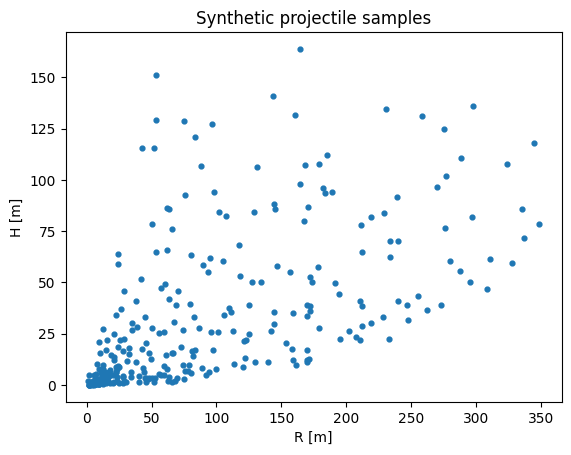

In [37]:
# --- Step 0: imports & knobs ---
import pandas as pd
import matplotlib.pyplot as plt

# 可调参数
N = 300                         # 样本数
g = 9.81                        # 重力加速度 [m/s^2]
v0_min, v0_max = 5.0, 60.0      # 初速度范围 [m/s]
th_min_deg, th_max_deg = 5.0, 85.0  # 角度范围 [deg]
seed = 42                       # 随机种子（复现实验）

# --- Step 1: generate samples ---
rng = np.random.default_rng(seed)
v0 = rng.uniform(v0_min, v0_max, size=N)
th = rng.uniform(th_min_deg, th_max_deg, size=N)
theta = np.deg2rad(th)

# 抛体运动（无阻力）的解析关系
R = (v0**2) * np.sin(2 * theta) / g
H = (v0**2) * (np.sin(theta)**2) / (2 * g)

# 如果想模拟测量噪声，可取消注释：
# R += rng.normal(0, 0.5, size=N)   # 射程噪声 [m]
# H += rng.normal(0, 0.2, size=N)   # 高度噪声 [m]

# --- Step 2: pack to DataFrame ---
df = pd.DataFrame({
    "v0_mps": v0,
    "theta_deg": th,
    "R_m": R,
    "H_m": H,
    "g_mps2": g
})

# --- Step 3: save & quick look ---
csv_path = "ift_projectile_samples.csv"
df.to_csv(csv_path, index=False)
print(f"Saved to {csv_path}")
display(df.head())

# --- Step 4: quick scatter plot (R vs H) ---
plt.figure()
plt.scatter(df["R_m"], df["H_m"], s=12)
plt.xlabel("R [m]")
plt.ylabel("H [m]")
plt.title("Synthetic projectile samples")
plt.show()


# 2. 曲面区域特征

当我们获得物理模型后，我们首先将其转化为隐函数的表示形式。例如，抛体运动的模型可以写为：

$$
\begin{aligned}
F_1(x,y) &= R - \frac{v_0^2 \sin(2\theta)}{g} = 0, \\
F_2(x,y) &= H - \frac{v_0^2 \sin^2\theta}{2g} = 0.
\end{aligned}
$$

---

## 2.1 Jacobian matrix

在隐函数场景下，**雅可比矩阵（Jacobian matrix）** 用于刻画函数在某一点的局部线性化特性。  
它是将“多个方程对多个变量的偏导数”排布成一个矩阵，用来分析局部的可解性、稳定性与敏感性。

假设有一个向量函数：
$$
\mathbf{F}(\mathbf{x}) =
\begin{bmatrix}
F_1(x_1,\dots,x_n) \\
F_2(x_1,\dots,x_n) \\
\vdots \\
F_m(x_1,\dots,x_n)
\end{bmatrix},
$$

其雅可比矩阵定义为：
$$
J(\mathbf{x}) =
\frac{\partial \mathbf{F}}{\partial \mathbf{x}} =
\begin{bmatrix}
\frac{\partial F_1}{\partial x_1} & \frac{\partial F_1}{\partial x_2} & \cdots & \frac{\partial F_1}{\partial x_n} \\
\frac{\partial F_2}{\partial x_1} & \frac{\partial F_2}{\partial x_2} & \cdots & \frac{\partial F_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial F_m}{\partial x_1} & \frac{\partial F_m}{\partial x_n} & \cdots & \frac{\partial F_m}{\partial x_n}
\end{bmatrix}.
$$

- 标量函数时，Jacobian 退化为梯度向量。  
- 向量函数时，Jacobian 描述输入邻域被函数映射到输出空间的 **方向拉伸与压缩**。

---

## 2.2 空间扫描

在获得 Jacobian 之后，我们需要进行类似“空间扫描”的操作，以评估不同变量组合下的显函数可行性。其基本框架为：

* **横向（列）**：不同的因变量分组（y-block）。

  * 若有 $m$ 个约束方程，每次必须选择恰好 $m$ 个变量作为因变量，构成 Jacobian submatrix：

    $$
    J_y = \frac{\partial F}{\partial y}.
    $$
  * 其余变量作为自变量。
  * → 这对应于 **因变量证否**：对于不同的因变量分组，判断它们是否能在某一区域内成功显函数化。

* **纵向（行）**：不同的样本点（基点）。

  * 可以来自实验/模拟数据，也可以是模型定义域内的采样点。
  * 每个采样点代表 Jacobian 在不同局部的数值特征。
  * → 这对应于 **基点证否**：即使在同一分组下，不同基点的可解性也可能不同，有的点可解，有的点处于边界或奇异点附近。

这样就形成了一个二维“扫描矩阵”：

* 行：样本点（基点证否）
* 列：候选因变量分组（因变量证否）
* 每个单元格存储该组合在该点的可解性 / 稳定性 / 敏感性指标。

---

以抛体运动模型的例子来看，我们先总结出它的隐函数表示：

$$
F(R, H, \theta, g, v_0) = 0,
$$

在下方的表格中：

* 列代表不同的因变量分组（即因变量证否的横向扫描）。
* 行代表我们通过实验得到的采样点位置，也就是基点（基点证否的纵向扫描）。

每一列可以视作是一个约束方程的 Jacobian submatrix。

<br>

<table border="1" cellspacing="0" cellpadding="6">
  <caption>不同的因变量分组（y-block）</caption>
  <tr>
    <th rowspan="7" style="writing-mode: vertical-rl; text-align: center;">
      采样点（基点证否）
    </th>
    <td></td>
    <td>(R, g)</td>
    <td>(R, H)</td>
    <td>(H，$\theta$)</td>
    <td>(R, $\theta$)</td>
    <td>(R, $v_0$)</td>
    <td>(H, g)</td>
    <td>(...)</td>
  </tr>
  <tr>
    <th>1</th>
    <td>$J_{1, (R, g)}$</td>
    <td>$J_{1, (R, H)}$</td>
    <td>$J_{1, (H，\theta)}$</td>
    <td>$J_{1, (R, \theta)}$</td>
    <td>$J_{1, (R, v_0)}$</td>
    <td>$J_{1, (H, g)}$</td>
  </tr>
  <tr>
    <th>2</th>
    <td>$J_{2, (R, g)}$</td>
    <td>$J_{2, (R, H)}$</td>
    <td>$J_{2, (H，\theta)}$</td>
    <td>$J_{2, (R, \theta)}$</td>
    <td>$J_{2, (R, v_0)}$</td>
    <td>$J_{2, (H, g)}$</td>
  </tr>
  <tr>
    <th>3</th>
    <td>$J_{3, (R, g)}$</td>
    <td>$J_{3, (R, H)}$</td>
    <td>$J_{3, (H，\theta)}$</td>
    <td>$J_{3, (R, \theta)}$</td>
    <td>$J_{3, (R, v_0)}$</td>
    <td>$J_{3, (H, g)}$</td>
  </tr>
  <tr>
    <th>4</th>
    <td>$J_{4, (R, g)}$</td>
    <td>$J_{4, (R, H)}$</td>
    <td>$J_{4, (H，\theta)}$</td>
    <td>$J_{4, (R, \theta)}$</td>
    <td>$J_{4, (R, v_0)}$</td>
    <td>$J_{4, (H, g)}$</td>
  </tr>
  <tr>
    <th>5</th>
    <td>$J_{5, (R, g)}$</td>
    <td>$J_{5, (R, H)}$</td>
    <td>$J_{5, (H，\theta)}$</td>
    <td>$J_{5, (R, \theta)}$</td>
    <td>$J_{5, (R, v_0)}$</td>
    <td>$J_{5, (H, g)}$</td>
  </tr>
  <tr>
    <th>...</th>
  </tr>
</table>

---

### 证否逻辑说明

* **因变量证否（横向）**：判断某一因变量组合是否具备全局可解性；如果在大量基点上 $\det J_y \approx 0$，说明该分组在整体上并不适合作为显函数化的选择。
* **基点证否（纵向）**：即使某一分组整体可行，在某些特定点上也可能退化到边界、奇异点或分叉点，从而导致局部显函数失效。

因此，空间扫描实际上是 **因变量选择 × 基点选择的二维交互检验**：

* 横向 → 哪些分组有潜力。
* 纵向 → 在什么范围内这些分组是可行的。
* 交叉 → 构建出显函数可解性的“马赛克地图”，为后续补丁拼贴奠定基础。

---

## 2.3 局部函数的可逆性判定

在隐函数定理的框架下，**可逆性判定**就是回答这样一个问题：

> 在给定的方程组约束下，某个变量分组 $y$ 是否能够在选定基点 $(x_0,y_0)$ 的邻域中，被唯一地表示为 $x$ 的函数？

换句话说，可逆性实际上就是显函数存在性与唯一性的局部判定条件。

---

### 2.3.1 理论条件

设方程组为

$$
F(x,y) = 0, \quad F:\mathbb{R}^{n+m} \to \mathbb{R}^m,
$$

其中 $x \in \mathbb{R}^n$ 表示自变量组，$y \in \mathbb{R}^m$ 表示因变量组。

* 构造关于因变量 $y$ 的 Jacobian 子矩阵：

  $$
  J_y(x,y) = \frac{\partial F}{\partial y}(x,y).
  $$

* 在某个基点 $(x_0,y_0)$ 处，如果满足

  $$
  \det J_y(x_0,y_0) \neq 0,
  $$

  那么根据隐函数定理，就存在一个邻域 $U$，使得在该邻域内，因变量 $y$ 可以唯一地表示为 $x$ 的函数：

  $$
  y = f(x), \quad (x,y)\in U.
  $$

---

### 2.3.2 直观解释

1. **几何角度**：

   * 隐函数曲面 $F(x,y)=0$ 是高维空间中的一个流形。
   * 判定 $\det J_y \neq 0$ 等价于说：在这一点附近，曲面相对于 $y$-方向的投影不塌缩。
   * 因此我们能把曲面“展开”为 $y=f(x)$ 的形式。

2. **代数角度**：

   * $\det J_y \neq 0$ 意味着方程组关于 $y$ 的线性化系统可解且唯一。
   * 如果 $\det J_y = 0$，则局部秩降低，解可能不唯一或不存在，显函数形式失效。

---

### 2.3.3 局部可解性的意义

* **显函数化的可能性**：只有当 $J_y$ 在基点处可逆时，才能保证在该邻域内显函数存在。
* **区域划分的必要性**：一旦 $\det J_y$ 在某些区域趋近于零，就意味着这一组因变量不再适合作为显函数表示，需要更换分组或重新划分补丁。
* **物理直觉**：在实验数据中，这通常对应“转捩点”“奇异点”或“退化情形”。

---

### 2.3.4 小例子：单位圆上的可逆性

考虑一个简单的约束方程：

$$
F(x,y) = x^2 + y^2 - 1 = 0,
$$

它对应单位圆。

* 关于因变量 $y$ 的 Jacobian 子矩阵就是：

  $$
  J_y = \frac{\partial F}{\partial y} = 2y.
  $$

* 在点 $(x_0,y_0) = (0,1)$：

  $$
  J_y(0,1) = 2 \neq 0 \quad \Rightarrow \quad \text{可解}.
  $$

  → 在该点附近，可以写作 $y = f(x) = +\sqrt{1-x^2}$。

* 在点 $(x_0,y_0) = (0,0)$：

  $$
  J_y(0,0) = 0 \quad \Rightarrow \quad \text{不可解}.
  $$

  → 在这里，隐函数定理失效，因为圆在该点与 $y$-轴切触，投影塌缩，无法唯一确定 $y$ 关于 $x$ 的关系，也就是说**在y为因变量时，我们对点(0, 0)进行了基点证否**。

In [40]:
import sympy as sp

# 定义符号变量
x, y = sp.symbols('x y')

# 定义隐函数方程：单位圆
F = x**2 + y**2 - 1

# 计算关于 y 的 Jacobian 子矩阵
J_y = sp.diff(F, y)

# 定义几个测试点
points = [(0, 1), (0, 0), (sp.Rational(1,2), sp.sqrt(3)/2)]

print("Jacobian submatrix wrt y:", J_y)

for pt in points:
    val = J_y.subs({x: pt[0], y: pt[1]})
    print(f"At point {pt}: J_y = {val}, ", end="")
    if val != 0:
        print("✅ 可解，可以展开为 y=f(x)")
    else:
        print("❌ 不可解，显函数形式失效")


Jacobian submatrix wrt y: 2*y
At point (0, 1): J_y = 2, ✅ 可解，可以展开为 y=f(x)
At point (0, 0): J_y = 0, ❌ 不可解，显函数形式失效
At point (1/2, sqrt(3)/2): J_y = sqrt(3), ✅ 可解，可以展开为 y=f(x)


✅ 这个例子展示了：

* 当 $J_y \neq 0$ 时，隐函数可以展开为显函数。
* 当 $J_y = 0$ 时，显函数描述失效，提示需要换变量或重新分区。

但其实我们可以看到，就圆形函数 $F$ 而言：

$$
F(x,y) = x^2 + y^2 - 1 = 0,
$$

$(0, 0)$ 点作为基点是不可能成立的，因为它本身不满足物理约束（不在解流形上），实验或模拟数据也不可能给出这一点。

---

### 启发

* **实验基点**：必须来自实际可观测或可模拟的数据，因此天然满足约束方程 $F(x,y)=0$。这意味着像 $(0,0)$ 这样的点永远不会进入实验分析。
* **理论基点**：在隐函数定理和 Jacobian 扫描中，我们仍然可以把这些“不可实现点”纳入考虑，用来揭示模型的极限性质和退化情况。

👉 对 MosaicPi 的意义是：

* **实验数据部分**，我们只会在物理可行点上进行可逆性判定；
* **模型扫描部分**，我们可以在更广的定义域上测试 Jacobian，从而识别潜在的奇异点、边界点或分叉点。

这样一来，实验数据和理论模型就形成互补：数据保证了“现实约束”，模型扩展了对“极端条件”的理解。

---

### 2.3.5 可逆性的更优判定

直接使用行列式 \(\det(J_y)\) 判定可逆性非常脆弱，建议采用 **奇异值与条件数**：

- **最小奇异值**：\(\sigma_{\min}(J_y)\)，越大说明远离奇异点。  
- **条件数**：\(\kappa(J_y) = \sigma_{\max}/\sigma_{\min}\)，衡量解的数值稳定性。  
- **符号信息**：\(\operatorname{sign}\det(J_y)\)，仅用于分支/方位判定，不用于数值阈值。  

判定分级示例：  
- **安全**：\(\kappa \leq 10^6\)  
- **警戒**：\(10^6 < \kappa \leq 10^8\)  
- **失效**：\(\kappa > 10^8\) 或 \(\sigma_{\min}/\sigma_{\max} < 10^{-8}\)  

---



## 2.4 灵敏度与误差传播

对于一个候选分组 \(y\) 与自变量集合 \(x\)，显函数的敏感性矩阵可写为：

$$
\frac{\partial y}{\partial x} = - J_y^{-1} J_x, \quad
J_x = \frac{\partial F}{\partial x}.
$$

用途：  
- 变量灵敏度排序：比较各列范数 \(\|\partial y/\partial x_j\|\)。  
- 误差传播：  
  \[
  \Sigma_y \approx \Big(\frac{\partial y}{\partial x}\Big) \Sigma_x \Big(\frac{\partial y}{\partial x}\Big)^\top
  \]
  由此量化输入误差对输出的影响。

---

## 2.5 数据结构与实现

与其仅存一个二维矩阵（样本 × 分组），更适合使用 **长表 / 三维张量** 来记录各项指标：  

- 索引：\((\text{sample } i, \ \text{y-block } p)\)  
- 字段：\(\sigma_{\min}, \ \kappa, \ \operatorname{sign}\det, \ \| \partial y/\partial x\|\) 各种范数、关键导数条目、残差 \(\|F\|\) 等。  

这样方便后续分区、聚类和可视化。

---

## 2.6 分区与拼接

在每个候选分组下，可以对 \(\kappa\) 或 \(\sigma_{\min}\) 的分布做连通域分析，得到局部适用范围。  
不同的分组覆盖不同区域时，将它们拼接起来，形成完整的 **显函数贴片马赛克**。  

---

## 2.7 注意事项与常见陷阱

- **过/欠定系统**：仅在 \(|y|=m\) 时才能判定可逆性。否则需改用伪逆与最小二乘。  
- **行列式误导**：\(\det\) 极易受量纲缩放与数值误差影响。应优先看奇异值与条件数。  
- **离解流形太远**：若 \(\|F\|\) 太大，即便 Jacobian 可逆，也不代表存在物理解。  
- **采样不足**：奇异点/转捩区需加密采样，否则分区边界抖动严重。  

---

✅ 总结：  
你的“行=样本点、列=因变量分组、单元格存指标”的扫描方式是正确的。  
改进点在于：  
- 列应表示 **y-block 分组** 而非 \(\delta y\)；  
- 指标需用 **奇异值与条件数** 替代单纯的 \(\det\)；  
- 加上灵敏度矩阵与误差传播分析，结果更稳健。  

最终，这一步为 **显函数贴片的拼接与分区** 提供了定量依据。


### 隐函数显式组合的存在性与稳定性筛选

## 1️⃣ 为什么先要选基点 $(x_0, y_0)$

* **隐函数定理是局部结果**：它不保证全局解，只保证在某个点附近存在唯一解 $y = g(x)$。
* 基点 $(x_0, y_0)$ 就是你检验这个局部可解性的“起始位置”，它必须满足：

  $$
  F(x_0, y_0) = 0
  $$

  也就是说，这个点在你的约束曲面（或流形）上。
---

## 2️⃣ 基点的作用

* **检验可解性条件**：
  在 $(x_0, y_0)$ 处计算 $J_yF(x_0, y_0)$，判断它是否可逆：

  $$
  \det J_yF(x_0, y_0) \neq 0
  $$

  如果成立，就能在该点附近把 $y$ 表示成 $x$ 的函数。
* **确定局部近似**：
  基点给了你线性化的中心，可以用

  $$
  \mathrm{d}y = - J_y^{-1} J_x\, \mathrm{d}x
  $$

  得到 $g'(x_0)$，作为切平面或一阶近似。
* **后续分区依据**：
  如果在不同区域选择不同的基点，可能会得到不同的 $x/y$ 分块方式，这就是**自动分区实验域**的基础。

---



**可解性条件（对 $y$ 可解）**：计算 $J_y=\partial F/\partial (v_0,\theta)$ 的行列式：

$$
\det J_y=\frac{2 v_0^3 \sin^2\theta}{g^2}.
$$

因此只要 $v_0\neq 0$ 且 $\sin\theta\neq 0$（即 $\theta\notin\{0,\pi\}$），就满足隐函数定理：在该基点附近可以局部写成 $y=g(x)$。


In [7]:
# Step: 定义 F 与 Jy，并在一条样本基点上检查 det(Jy)≠0


y = sp.Matrix([v0, th])
Jy = F.jacobian(y)                 # ∂F/∂y
det_Jy = sp.simplify(sp.det(Jy))   # 行列式（可解性判据）
print("Symbolic det(Jy) =", det_Jy)

# 2) 数值化函数
F_func     = sp.lambdify((R, H, v0, th, g), F, 'numpy')
Jy_func    = sp.lambdify((R, H, v0, th, g), Jy, 'numpy')
detJy_func = sp.lambdify((R, H, v0, th, g), det_Jy, 'numpy')
# 3) 取数据表第一行作为基点 (x0, y0)
row = df.iloc[0]
R0, H0      = float(row["R_m"]), float(row["H_m"])
v00         = float(row["v0_mps"])
th0         = np.deg2rad(float(row["theta_deg"]))  # 注意转换为弧度
g0          = float(row["g_mps2"])

# 4) 基点可解性判定
F_val   = np.array(F_func(R0, H0, v00, th0, g0), dtype=float).ravel()
Jy_val  = np.array(Jy_func(R0, H0, v00, th0, g0), dtype=float)
det_val = float(detJy_func(R0, H0, v00, th0, g0))

print("F(x0,y0) =", F_val)                # 应接近 0（无噪声时精确为 0）
print("Jy(x0,y0) =\n", Jy_val)
print("det(Jy)(x0,y0) =", det_val)

eps_F, eps_J = 1e-8, 1e-10
invertible = (np.linalg.norm(F_val) < eps_F) and (abs(det_val) > eps_J)
print("Locally solvable for y at (x0,y0)?", invertible)


R - v0**2*sin(2*th)/g


### 下边的代码是使用sympy进行符号计算的过程

**Step 0：** 先列出参数，噪声，输出内容等数据

In [11]:
# ===============================================
# Implicit-function existence & stability screening
# (Projectile motion, drag-free) — with comments
# ===============================================

# --- Step 0: imports & knobs ---
import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

from itertools import combinations
from numpy.linalg import inv, cond, norm, LinAlgError

# ===== 可调参数 =====
N = 300                          # 样本数
g_val = 9.81                     # 重力加速度 [m/s^2]
v0_min, v0_max = 5.0, 60.0       # 初速度范围 [m/s]
th_min_deg, th_max_deg = 5.0, 85.0  # 发射角范围 [deg]
seed = 42                        # 随机种子（复现实验）

add_noise = False                # 是否添加观测噪声
noise_R = 0.5                    # 射程噪声 [m]
noise_H = 0.2                    # 最高点噪声 [m]

save_csv = True                  # 是否保存CSV
make_plots = True                # 是否画图（直方图）

# 数值阈值（行列式与可解性）
EPS_DET = 1e-12




Matrix([[R - v0**2*sin(2*th)/g], [H - v0**2*sin(th)**2/(2*g)]])


**Step 1：** 对采样点进行数据生成，写入物理方程

  $$
  R = \frac{v_0^2\sin(2\theta)}{g}, \quad H = \frac{v_0^2\sin^2\theta}{2g}
  $$

In [12]:
# --- Step 1: generate samples (synthetic, no-drag) ---
rng = np.random.default_rng(seed)

# 物理原始变量：v0, theta
v0 = rng.uniform(v0_min, v0_max, size=N)
theta_deg = rng.uniform(th_min_deg, th_max_deg, size=N)
theta = np.deg2rad(theta_deg)   # 统一用弧度做计算

# 无阻力抛体关系
R = (v0**2) * np.sin(2 * theta) / g_val
H = (v0**2) * (np.sin(theta)**2) / (2 * g_val)

# 可选：加入观测噪声（模拟实验测量）
if add_noise:
    R = R + rng.normal(0, noise_R, size=N)
    H = H + rng.normal(0, noise_H, size=N)

df = pd.DataFrame({
    "v0_mps": v0,
    "theta_deg": theta_deg,
    "R_m": R,
    "H_m": H,
    "g_mps2": g_val
})

if save_csv:
    df.to_csv("ift_projectile_samples.csv", index=False)

**Step 2：** 创建符号矩阵，计算Jacobian


> **雅可比矩阵的定义**

> 在隐函数场景下，**雅可比矩阵（Jacobian matrix）** 可以理解为把“多个方程对多个变量的偏导”排成一个矩阵，用来描述函数在某个点的 **局部线性化** 特性。

> 假设你有一个向量函数

> $$
\mathbf{F}(\mathbf{x}) =
\begin{bmatrix}
F_1(x_1,\dots,x_n) \\
F_2(x_1,\dots,x_n) \\
\vdots \\
F_m(x_1,\dots,x_n)
\end{bmatrix}
$$

它的雅可比矩阵定义为：

$$
J(\mathbf{x}) =
\frac{\partial \mathbf{F}}{\partial \mathbf{x}} =
\begin{bmatrix}
\frac{\partial F_1}{\partial x_1} & \frac{\partial F_1}{\partial x_2} & \cdots & \frac{\partial F_1}{\partial x_n} \\
\frac{\partial F_2}{\partial x_1} & \frac{\partial F_2}{\partial x_2} & \cdots & \frac{\partial F_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial F_m}{\partial x_1} & \frac{\partial F_m}{\partial x_2} & \cdots & \frac{\partial F_m}{\partial x_n}
\end{bmatrix}
$$


* 对于标量函数（梯度）：Jacobian 退化成梯度向量。
* 对于向量函数：Jacobian 描述了输入空间的一个小邻域被函数映射到输出空间的**方向拉伸与压缩**。

---

**示例**

- 先使用sympy的symbols()进行映射。
- 将物理方程$F_1$, $F_2$进行sympy化。
- 组装物理模型为2x1的矩阵
$$
F =
\begin{bmatrix}
F_1 \\
F_2
\end{bmatrix}
=
\begin{bmatrix}
R - \dfrac{v_0^2 \sin(2\theta)}{g} \\
H - \dfrac{v_0^2 \sin^2\theta}{2g}
\end{bmatrix}
$$

之后**对Jacobian进行求解**：

$$
J_{\text{all}}=
\begin{bmatrix}
\frac{\partial F_1}{\partial R} & \frac{\partial F_1}{\partial H} & \frac{\partial F_1}{\partial v_0} & \frac{\partial F_1}{\partial \theta}\\[6pt]
\frac{\partial F_2}{\partial R} & \frac{\partial F_2}{\partial H} & \frac{\partial F_2}{\partial v_0} & \frac{\partial F_2}{\partial \theta}
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & -\dfrac{2 v_0 \sin(2\theta)}{g} & -\dfrac{2 v_0^2 \cos(2\theta)}{g} \\
0 & 1 & -\dfrac{v_0 \sin^2\theta}{g} & -\dfrac{v_0^2 \sin(2\theta)}{2g}
\end{bmatrix}
$$


---


In [14]:
# --- Step 2: define F symbolically & prebuild Jacobian ---
# F: R^2 x R^2 -> R^2, 在这里我们关心变量集合 [R, H, v0, th] 的偏导整体
# 当前只是创建符号的映射关系，并且声明这些变量为实数。
R_s, H_s, v0_s, th_s, g_s = sp.symbols('R H v0 th g', real=True)

F1 = R_s - (v0_s**2) * sp.sin(2*th_s) / g_s
F2 = H_s - (v0_s**2) * (sp.sin(th_s)**2) / (2*g_s)
# 创建一个符号矩阵，可以进行矩阵加减乘、求逆、求行列式等。
# 这里传入[F1, F2]，得到一个2x1的列向量
F = sp.Matrix([F1, F2])  # 2x1

# 对 [R, H, v0, th] 一次性求雅可比，便于之后切片出 Jy 与 Jx
all_vars = [R_s, H_s, v0_s, th_s]      # 顺序要与实际切片一致
J_all = F.jacobian(all_vars)           # 2x4

print("\nJ_all = ∂F/∂[R, H, v0, th] (2x4):")
sp.pprint(J_all)


J_all = ∂F/∂[R, H, v0, th] (2x4):
⎡                               2             ⎤
⎢      -2⋅v₀⋅sin(2⋅th)     -2⋅v₀ ⋅cos(2⋅th)   ⎥
⎢1  0  ────────────────    ─────────────────  ⎥
⎢             g                    g          ⎥
⎢                                             ⎥
⎢              2            2                 ⎥
⎢       -v₀⋅sin (th)     -v₀ ⋅sin(th)⋅cos(th) ⎥
⎢0  1   ─────────────    ─────────────────────⎥
⎣             g                    g          ⎦


---

**Step 3：** 变量分组 ** 隐函数显式化的前置工作

* 决定哪些变量要解 - **因变量** (independent variables)记为 **y**
* 决定哪些变量是已知 - **自变量** (dependent variables)记为 **x**

* 为什么隐函数定理会先分组？

隐函数定理告诉我们：

* 如果在某个基点 $(y_0, x_0)$ 处，雅可比矩阵

  $$
  J_y = \frac{\partial F}{\partial y}
  $$

  是可逆的（$\det(J_y) \neq 0$），
* 那么在这个基点附近，隐函数可以**局部显式化**成 $y = f(x)$。

所以：

1. **变量分组** → 明确 $J_y$ 要对哪些变量求偏导
2. **检查 $\det(J_y) \neq 0$** → 判断显式化是否可能
3. **显式化** → 真正解出 $y=f(x)$（解析或数值）

---

**例子**

$$
F_1(R,H,v_0,\theta) = 0, \quad F_2(R,H,v_0,\theta) = 0
$$

* 变量分组（比如 $y = [v_0,\theta], x = [R,H]$）只是说：

  > 我打算已知 $R,H$，去求 $v_0,\theta$。


In [15]:
# 选择要解的未知量 y = [v0, th]，以及已知量 x = [R, H]
idx_y = [2, 3]  # 在 all_vars 中 v0, th 的位置
idx_x = [0, 1]  # 在 all_vars 中 R, H 的位置

Jy = J_all[:, idx_y]  # 2x2
Jx = J_all[:, idx_x]  # 2x2

print("\nJy = ∂F/∂[v0, th] (2x2):")
sp.pprint(Jy)

print("\nJx = ∂F/∂[R, H] (2x2):")
sp.pprint(Jx)

# # --- 也可以进行批量的选择 ---
# # 这里示范“y 取两个变量，其余两个为 x”的情形：C(4,2)=6种
# candidate_y_blocks = list(combinations(range(4), 2))



Jy = ∂F/∂[v0, th] (2x2):
⎡                         2             ⎤
⎢-2⋅v₀⋅sin(2⋅th)     -2⋅v₀ ⋅cos(2⋅th)   ⎥
⎢────────────────    ─────────────────  ⎥
⎢       g                    g          ⎥
⎢                                       ⎥
⎢        2            2                 ⎥
⎢ -v₀⋅sin (th)     -v₀ ⋅sin(th)⋅cos(th) ⎥
⎢ ─────────────    ─────────────────────⎥
⎣       g                    g          ⎦

Jx = ∂F/∂[R, H] (2x2):
⎡1  0⎤
⎢    ⎥
⎣0  1⎦


---

**Step 4：**  用 `lambdify` 变成可数值调用的函数
会把“符号表达式”转换成“可用 NumPy 计算的数值函数”。

你可以给定一组数值（例如$R, H, v_0, \theta, g$)，快速得到雅可比矩阵的数值。

In [19]:
import numpy as np

# ⑦ 把 J_all 符号表达式编译成可调用的数值函数
J_func = sp.lambdify((R_s, H_s, v0_s, th_s, g_s), J_all, 'numpy')

# ⑧ 随便给一组物理上合理的数值评估（单位自定，只要自洽）
R_val  = 100.0            # 例如 100 m
H_val  = 10.0             # 例如 10 m
v0_val = 30.0             # 30 m/s
th_val = np.deg2rad(45)   # 45 度
g_val  = 9.81             # 9.81 m/s^2

J_num = np.array(J_func(R_val, H_val, v0_val, th_val, g_val), dtype=float)

print("\nJ_all (numeric 2x4) at R=100, H=10, v0=30, th=45°, g=9.81:")
print(J_num)

# 同理也可以把 Jy、Jx lambdify 出来
Jy_func = sp.lambdify((R_s, H_s, v0_s, th_s, g_s), Jy, 'numpy')
Jx_func = sp.lambdify((R_s, H_s, v0_s, th_s, g_s), Jx, 'numpy')

Jy_num = np.array(Jy_func(R_val, H_val, v0_val, th_val, g_val), dtype=float)
Jx_num = np.array(Jx_func(R_val, H_val, v0_val, th_val, g_val), dtype=float)

print("\nJy (numeric 2x2):")
print(Jy_num)

print("\nJx (numeric 2x2):")
print(Jx_num)



J_all (numeric 2x4) at R=100, H=10, v0=30, th=45°, g=9.81:
[[ 1.00000000e+00  0.00000000e+00 -6.11620795e+00 -1.12352917e-14]
 [ 0.00000000e+00  1.00000000e+00 -1.52905199e+00 -4.58715596e+01]]

Jy (numeric 2x2):
[[-6.11620795e+00 -1.12352917e-14]
 [-1.52905199e+00 -4.58715596e+01]]

Jx (numeric 2x2):
[[1. 0.]
 [0. 1.]]


In [25]:
# --- 线性性判定工具函数 ---

def is_affine_in_vars(F_vec, vars_list):
    """判定 F 对 vars_list 是否仿射：对每个分量的 Hessian(vars)=0"""
    n = len(vars_list)
    Z = sp.zeros(n)
    for Fi in F_vec:  # Fi 是标量表达式
        H = sp.hessian(Fi, vars_list)
        if not H.equals(Z):
            return False
    return True

def jacobian_has_var_dependence(J, vars_list):
    """判定雅可比是否依赖 vars_list 中的任何变量（依赖则非常系数）"""
    return len((J.free_symbols) & set(vars_list)) > 0

# --- 变量集合 ---
z_vars = [R_s, H_s, v0_s, th_s]
y_vars = [v0_s, th_s]
x_vars = [R_s, H_s]

# --- 线性/仿射性判定 ---
is_affine_all = is_affine_in_vars(F, z_vars)      # F 是否对所有变量仿射
is_affine_y   = is_affine_in_vars(F, y_vars)      # F 是否对因变量 y 仿射（x 视作参数）

# --- 常系数检查（Jacobian 是否与变量有关）---
J_all_dep_on_z = jacobian_has_var_dependence(J_all, z_vars)  # True 表示非常系数
Jy_dep_on_z    = jacobian_has_var_dependence(Jy,    z_vars)
Jy_dep_on_y    = jacobian_has_var_dependence(Jy,    y_vars)  # True 表示对 y 的系数随 y/x 变化

print("\n[Linearity checks]")
print(f"F affine in all vars [R,H,v0,th]?           {is_affine_all}")
print(f"F affine in y=[v0,th] (x treated as params)? {is_affine_y}")

print("\n[Constant-coefficient checks]")
print(f"J_all depends on variables (non-constant)?   {J_all_dep_on_z}")
print(f"Jy depends on variables (non-constant)?      {Jy_dep_on_z}")
print(f"Jy depends on y (nonlinear-in-y coefficients)? {Jy_dep_on_y}")

# 一点解读提示（可选打印）：
if is_affine_y and not Jy_dep_on_y:
    print("\n=> 对 y 是线性的，且对 y 的系数不随 y 变化：这是常系数线性（关于 y）。")
elif is_affine_y and Jy_dep_on_y:
    print("\n=> 对 y 是线性的，但系数随变量变化：这是变系数线性（关于 y）。")
else:
    print("\n=> 对 y 非线性。")



[Linearity checks]
F affine in all vars [R,H,v0,th]?           False
F affine in y=[v0,th] (x treated as params)? False

[Constant-coefficient checks]
J_all depends on variables (non-constant)?   True
Jy depends on variables (non-constant)?      True
Jy depends on y (nonlinear-in-y coefficients)? True

=> 对 y 非线性。


---

**Step 5：**  **可逆性判定：** $det(J_y)$的计算与数值检测（含阈值判断）

如果隐函数是：

$$
\mathbf{F}(\mathbf{x}, \mathbf{y}) = 0
$$

且在某个基点（**视作采样点**） $(\mathbf{x}_0,\mathbf{y}_0)$ 处，关于 $\mathbf{y}$ 的雅可比矩阵

$$
J_y = \frac{\partial \mathbf{F}}{\partial \mathbf{y}}
$$

是**可逆的**（满秩），那么根据隐函数定理，$\mathbf{y}$ 可以在该点附近唯一地表示成 $\mathbf{y} = g(\mathbf{x})$。

也就是说：

* **可逆** ⇒ 当地可以解出 $\mathbf{y}$ 对 $\mathbf{x}$ 的显式函数。
* **不可逆** ⇒ 可能存在奇异点、分叉、非唯一解。
* $J_y$ 可逆表示“在 $\mathbf{y}$ 方向上这个曲面是可解的”。
* $J_y$ 奇异表示曲面在该方向变得平坦或折叠，导致解的唯一性丢失。

---

在下边的代码中，我们通过可逆性和满秩来一同验证当前变量组合的可解性。

In [18]:
# --- 可逆性：det(Jy) ---

# 1) 象征式行列式（便于检查/化简/推导）
det_Jy_sym = sp.simplify(Jy.det())
print("\nSymbolic det(Jy) =")
sp.pprint(det_Jy_sym)

# 2) 数值版 det(Jy)
det_Jy_func = sp.lambdify((R_s, H_s, v0_s, th_s, g_s), det_Jy_sym, 'numpy')
det_Jy_val = float(det_Jy_func(R_val, H_val, v0_val, th_val, g_val))
print(f"\nNumeric det(Jy) at the chosen point = {det_Jy_val:.6e}")

# 3) 可解性判定（阈值可根据量纲/尺度调整）
#    注意：仅用 det != 0 在浮点下不可靠，因此用 |det| > tol 作为“数值可逆”的判断
tol = 1e-10
is_solvable = abs(det_Jy_val) > tol
print(f"Solvable (|det(Jy)| > {tol}): {is_solvable}")

# 4) 辅助：也可用秩判断“数值满秩”
rank_Jy = np.linalg.matrix_rank(Jy_num, hermitian=False)
print(f"rank(Jy) = {rank_Jy} (期待为 2 才数值可逆)")



Symbolic det(Jy) =
    3    2    
2⋅v₀ ⋅sin (th)
──────────────
       2      
      g       

Numeric det(Jy) at the chosen point = 2.805600e+02
Solvable (|det(Jy)| > 1e-10): True
rank(Jy) = 2 (期待为 2 才数值可逆)


---

**Step 5：**  **Jacobian 矩阵的条件数(Condition Number)** $det(J_y)$的计算与数值检测（含阈值判断）

在数值分析里它用来衡量矩阵的**数值稳定性**和**可逆性好坏**。

在隐函数、力学计算等场景中，cond(J) 是判断**局部解敏感性**的重要指标。

## 1. 定义

对于一个矩阵 $J$，其条件数（通常是 2-范数意义下）定义为：

$$
\mathrm{cond}(J) = \|J\|_2 \cdot \|J^{-1}\|_2
$$

如果 $J$ 是方阵，这个公式也可以写成：

$$
\mathrm{cond}(J) = \frac{\sigma_{\max}}{\sigma_{\min}}
$$

其中：

* $\sigma_{\max}$ 是最大奇异值（矩阵拉伸空间的最大比例）
* $\sigma_{\min}$ 是最小奇异值（最小拉伸比例）

---

## 2. 物理/几何意义

* $J$ 描述了输入空间 $\mathbf{x}$ 到输出空间 $\mathbf{F}(\mathbf{x})$ 的局部线性映射。
* $\mathrm{cond}(J)$ 衡量这个映射的**各方向拉伸比的悬殊程度**：

  * **cond ≈ 1**：各方向缩放比例差不多，映射接近等距，数值稳定。
  * **cond 很大**：某些方向几乎被压扁（σ\_min 很小），说明这个方向上的信息会被放大成很大的数值误差，矩阵接近奇异。

---

## 3. 在隐函数问题中的作用

在隐函数定理应用中：

* 我们通常关心 $J_y = \frac{\partial \mathbf{F}}{\partial \mathbf{y}}$。
* 当 $\mathrm{cond}(J_y)$ 很小时（接近 1），说明局部可逆且数值计算稳定。
* 当 $\mathrm{cond}(J_y)$ 很大时，即使 $\det(J_y) \neq 0$，数值上也会表现为**病态可逆**，容易出现大误差或不稳定解。
* 当 $\mathrm{cond}(J_y) \to \infty$ 时，σ\_min → 0，矩阵奇异，局部不可逆，通常意味着分叉点、临界状态。

---

## 4. 力学中的类比

条件数在力学上很像**刚度矩阵的病态性**：

* **cond 小** ⇒ 各自由度的刚度平衡，加载方向都可控。
* **cond 大** ⇒ 存在软模态（soft mode），某个方向的刚度很小，系统对该方向的扰动非常敏感，可能进入失稳/屈曲。

---

## 6. 常用判断标准

| cond(J) 大小       | 数值意义 | 物理解释（力学）  |
| ---------------- | ---- | --------- |
| $\approx 1$      | 非常稳定 | 方向各向同性    |
| $10^1 \sim 10^3$ | 可接受  | 稍有方向差异    |
| $10^4 \sim 10^8$ | 数值病态 | 存在软模态或强耦合 |
| $\to \infty$     | 奇异矩阵 | 不可逆、分叉点   |

---




In [23]:
# --- Step 5: 计算条件数 cond(Jy) ---

cond_Jy = np.linalg.cond(Jy_num)
print(f"\ncond(Jy) = {cond_Jy:.6e}")



cond(Jy) = 7.508484e+00


**Step 6：**  **Jacobian 矩阵的敏感性** 

$$S = -J^{-1}_y J_x$$

它给出“自变量微小变化 δx 对因变量 δy 的线性响应”：$\delta{y} = S \delta{x}$

In [24]:
# --- Step 6: 敏感性矩阵 S = - Jy^{-1} Jx ---

# 先切出 Jx（这里按 y=[v0, th], x=[R, H]）
idx_y = [2, 3]          # 因变量 v0, th
idx_x = [0, 1]          # 自变量 R, H
Jy = J_all[:, idx_y]    # 2x2
Jx = J_all[:, idx_x]    # 2x2

# 符号式敏感性：用 LUsolve 避免显式逆，更稳
S_sym = - Jy.LUsolve(Jx)        # 等价于 -(Jy.inv() * Jx)，但数值更稳
S_sym = sp.simplify(S_sym)

print("\nSymbolic Sensitivity S = -Jy^{-1} Jx:")
sp.pprint(S_sym)

# 数值版：lambdify 并代入基点
S_func  = sp.lambdify((R_s, H_s, v0_s, th_s, g_s), S_sym, 'numpy')
Jy_func = sp.lambdify((R_s, H_s, v0_s, th_s, g_s), Jy,     'numpy')  # 若你还想复用 Jy 数值
Jx_func = sp.lambdify((R_s, H_s, v0_s, th_s, g_s), Jx,     'numpy')

S_num  = np.array(S_func(R_val, H_val, v0_val, th_val, g_val), dtype=float)
Jy_num = np.array(Jy_func(R_val, H_val, v0_val, th_val, g_val), dtype=float)
Jx_num = np.array(Jx_func(R_val, H_val, v0_val, th_val, g_val), dtype=float)

print("\nS (numeric, 2x2) with rows [dv0, dth], cols [dR, dH]:")
print(S_num)

# --- 可选：归一化敏感性（相对变化），便于比较不同量纲/尺度 ---
# S_rel[i,j] = (∂y_i/∂x_j) * (x_j / y_i)
x_vec = np.array([R_val, H_val], dtype=float)     # 自变量基点
y_vec = np.array([v0_val, th_val], dtype=float)   # 因变量基点
S_rel_num = S_num * x_vec[None, :] / y_vec[:, None]

print("\nS_rel (relative sensitivity) where S_rel[i,j] = (∂y_i/∂x_j)*(x_j/y_i):")
print(S_rel_num)

# --- 可选：校验线性近似 δy ≈ S δx ---
# 举例: 让 R 增加 1%，H 不变，看看 δy 的线性预测
delta_x = np.array([0.01 * R_val, 0.0], dtype=float)
delta_y_lin = S_num @ delta_x
print("\nExample: R +1% (H fixed) → predicted [δv0, δth]:")
print(delta_y_lin)



Symbolic Sensitivity S = -Jy^{-1} Jx:
⎡     g        g         g     ⎤
⎢────────────  ── - ───────────⎥
⎢2⋅v₀⋅tan(th)  v₀         2    ⎥
⎢                   v₀⋅tan (th)⎥
⎢                              ⎥
⎢    -g              2⋅g       ⎥
⎢   ─────        ───────────   ⎥
⎢       2          2           ⎥
⎣   2⋅v₀         v₀ ⋅tan(th)   ⎦

S (numeric, 2x2) with rows [dv0, dth], cols [dR, dH]:
[[ 1.63500000e-01 -5.55111512e-17]
 [-5.45000000e-03  2.18000000e-02]]

S_rel (relative sensitivity) where S_rel[i,j] = (∂y_i/∂x_j)*(x_j/y_i):
[[ 5.45000000e-01 -1.85037171e-17]
 [-6.93915552e-01  2.77566221e-01]]

Example: R +1% (H fixed) → predicted [δv0, δth]:
[ 0.1635  -0.00545]


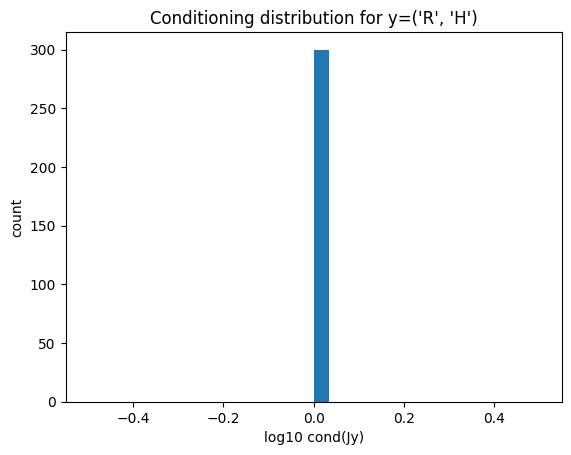

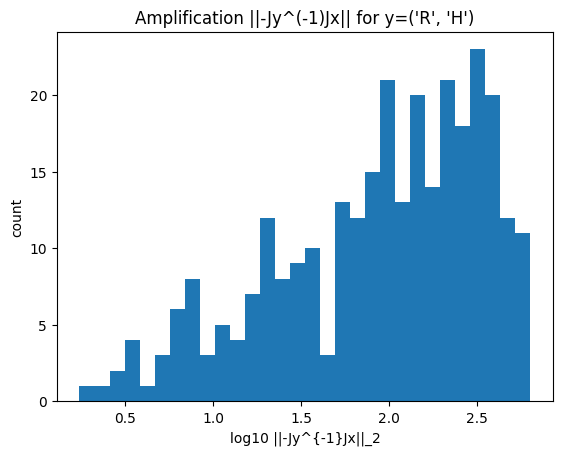

,y_block,x_block,invertible_rate,median_cond,p90_cond,median_gain,p90_gain,median_amp,p90_amp
0,"(R, H)","(v0, th)",1.0,1.000000,1.000000,1.000000,1.000000,112.003841,381.452539
1,"(H, v0)","(R, th)",1.0,5.477179,10.596539,1.049310,1.552748,70.911449,298.445302
2,"(R, v0)","(H, th)",1.0,22.811350,65.736231,4.124916,19.222648,216.158395,599.379913
3,"(v0, th)","(R, H)",1.0,42.363186,720.705353,0.405693,8.809491,0.405693,8.809491
4,"(H, th)","(R, v0)",1.0,152.472621,440.207544,1.048827,2.208880,3.103615,13.567313


In [26]:
J_funcs = sp.lambdify((R_s, H_s, v0_s, th_s, g_s), J_all, 'numpy')

# 变量名称（用于展示）
var_names = ['R', 'H', 'v0', 'th']


# --- Step 4: evaluation function ---
def evaluate_block(y_idx_pair, df, eps_det=EPS_DET):
    """
    对特定的 y-block（两个变量）做存在性与稳定性评估：
    - 可解性：det(Jy) != 0
    - 稳定性：cond(Jy), ||Jy^{-1}||_2, ||-Jy^{-1} Jx||_2

    返回：
    - diag_df: 每个样本的逐点诊断
    - summary: 该组合的整体统计（用于排序）
    """
    y_idx = list(y_idx_pair)
    x_idx = [i for i in range(4) if i not in y_idx]

    y_names = [var_names[i] for i in y_idx]
    x_names = [var_names[i] for i in x_idx]

    rows = []
    det_list, cond_list, gain_list, amp_list, inv_flags = [], [], [], [], []

    for i in range(len(df)):
        # 取样本点（注意 theta 用弧度代入符号函数）
        R0 = float(df.loc[i, 'R_m'])
        H0 = float(df.loc[i, 'H_m'])
        v00 = float(df.loc[i, 'v0_mps'])
        th0 = float(np.deg2rad(df.loc[i, 'theta_deg']))
        g0  = float(df.loc[i, 'g_mps2'])

        # 2x4 雅可比矩阵
        J_all_np = np.array(J_funcs(R0, H0, v00, th0, g0), dtype=float)

        # 切出 Jy (2x2), Jx (2x2)
        Jy = J_all_np[:, y_idx]     # 对 y 的偏导
        Jx = J_all_np[:, x_idx]     # 对 x 的偏导

        # 可解性：det(Jy) != 0（仅在 2x2 情形可用）
        try:
            det_val = float(np.linalg.det(Jy))
        except LinAlgError:
            det_val = np.nan

        is_invertible = np.isfinite(det_val) and (abs(det_val) > eps_det)

        # 稳定性指标：cond(Jy), ||Jy^{-1}||_2, ||-Jy^{-1} Jx||_2
        if is_invertible:
            try:
                Jy_inv = inv(Jy)
                kappa = cond(Jy)                  # 2-范数条件数
                gain  = norm(Jy_inv, 2)           # ||Jy^{-1}||_2：F扰动→y扰动
                amp   = norm(-Jy_inv @ Jx, 2)     # ||-Jy^{-1}Jx||_2：x扰动→y扰动
            except LinAlgError:
                kappa, gain, amp = np.inf, np.inf, np.inf
        else:
            kappa, gain, amp = np.inf, np.inf, np.inf

        rows.append({
            'sample': i,
            'R': R0, 'H': H0, 'v0': v00, 'th(rad)': th0,
            'det(Jy)': det_val,
            'invertible': is_invertible,
            'cond(Jy)': kappa,
            '||Jy^{-1}||_2': gain,
            '||-Jy^{-1}Jx||_2': amp
        })

        det_list.append(det_val)
        cond_list.append(kappa)
        gain_list.append(gain)
        amp_list.append(amp)
        inv_flags.append(is_invertible)

    diag_df = pd.DataFrame(rows)

    # 统计函数（忽略 inf / nan）
    def finite_percentile(arr, q):
        arr = np.array([a for a in arr if np.isfinite(a)], dtype=float)
        if arr.size == 0: return np.nan
        return float(np.percentile(arr, q))

    summary = {
        'y_block': tuple(y_names),
        'x_block': tuple(x_names),
        'invertible_rate': float(np.mean(inv_flags)),
        'median_cond': finite_percentile(cond_list, 50),
        'p90_cond':    finite_percentile(cond_list, 90),
        'median_gain': finite_percentile(gain_list, 50),
        'p90_gain':    finite_percentile(gain_list, 90),
        'median_amp':  finite_percentile(amp_list, 50),
        'p90_amp':     finite_percentile(amp_list, 90),
    }
    return diag_df, summary

# --- Step 5: evaluate all candidate blocks & rank ---
summaries = []
diagnostics = {}  # key: y_block(tuple of names) -> per-sample diagnostics

for y_pair in candidate_y_blocks:
    diag_df, summary = evaluate_block(y_pair, df, eps_det=EPS_DET)
    summaries.append(summary)
    diagnostics[summary['y_block']] = diag_df

summary_df = pd.DataFrame(summaries)

# 排序准则：可解率高优先 → 条件数中位数低 → 放大因子 p90 低
summary_df = summary_df.sort_values(
    by=['invertible_rate', 'median_cond', 'p90_amp'],
    ascending=[False, True, True]
).reset_index(drop=True)

# 可选：保存结果
if save_csv:
    summary_df.to_csv("implicit_block_screen_summary.csv", index=False)
    # 保存 top 组合的逐样本诊断
    top_block = tuple(summary_df.loc[0, 'y_block'])
    diagnostics[top_block].to_csv(f"diagnostics_top_block_{'_'.join(top_block)}.csv", index=False)

# --- Step 6: quick plots (optional) ---
if make_plots:
    top_block = tuple(summary_df.loc[0, 'y_block'])
    top_diag = diagnostics[top_block]

    # 只对有限值作直方图
    finite_cond = top_diag['cond(Jy)'][np.isfinite(top_diag['cond(Jy)'])]
    finite_amp  = top_diag['||-Jy^{-1}Jx||_2'][np.isfinite(top_diag['||-Jy^{-1}Jx||_2'])]

    plt.figure()
    plt.hist(np.log10(finite_cond), bins=30)
    plt.xlabel('log10 cond(Jy)')
    plt.ylabel('count')
    plt.title(f'Conditioning distribution for y={top_block}')
    plt.show()

    plt.figure()
    plt.hist(np.log10(finite_amp), bins=30)
    plt.xlabel('log10 ||-Jy^{-1}Jx||_2')
    plt.ylabel('count')
    plt.title(f'Amplification ||-Jy^(-1)Jx|| for y={top_block}')
    plt.show()

# --- Step 7: 展示核心输出（可在Notebook中直接查看） ---
summary_df.head()

In [9]:
# ===============================================
# Implicit-function existence & stability screening
# (General y/x dimensions; projectile motion example)
# ===============================================

import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt
from itertools import combinations
from numpy.linalg import svd, matrix_rank, pinv, norm

# -----------------------------
# 0) 可调参数
# -----------------------------
N = 300
g_val = 9.81
v0_min, v0_max = 5.0, 60.0
th_min_deg, th_max_deg = 5.0, 85.0
seed = 42

ADD_NOISE = False
noise_R = 0.5
noise_H = 0.2

SAVE_CSV   = False
MAKE_PLOTS = False

# —— 关键：设置 y 的维度（可选 1/2/3）——
Y_DIM = 2   # 例：设为 1 则 y 取 1 个变量；设为 3 则 y 取 3 个变量

# 数值阈值
EPS_FULLRANK = 1e-12  # 判定满秩的奇异值下限

rng = np.random.default_rng(seed)

# -----------------------------
# 1) 生成样本（无阻力抛体）
# -----------------------------
v0 = rng.uniform(v0_min, v0_max, size=N)
theta_deg = rng.uniform(th_min_deg, th_max_deg, size=N)
theta = np.deg2rad(theta_deg)

R = (v0**2) * np.sin(2 * theta) / g_val
H = (v0**2) * (np.sin(theta)**2) / (2 * g_val)

if ADD_NOISE:
    R = R + rng.normal(0, noise_R, size=N)
    H = H + rng.normal(0, noise_H, size=N)

df = pd.DataFrame({
    "v0_mps": v0,
    "theta_deg": theta_deg,
    "R_m": R,
    "H_m": H,
    "g_mps2": g_val
})
if SAVE_CSV:
    df.to_csv("ift_projectile_samples.csv", index=False)

# -----------------------------
# 2) 符号构造 F 及总雅可比 J_all（对 [R,H,v0,th]）
# -----------------------------
R_s, H_s, v0_s, th_s, g_s = sp.symbols('R H v0 th g', real=True)

F1 = R_s - (v0_s**2)*sp.sin(2*th_s)/g_s
F2 = H_s - (v0_s**2)*(sp.sin(th_s)**2)/(2*g_s)
F  = sp.Matrix([F1, F2])              # m=2 维

all_vars = [R_s, H_s, v0_s, th_s]     # 4 个候选变量的顺序
var_names = ['R', 'H', 'v0', 'th']

J_all = F.jacobian(all_vars)          # 2x4
J_func = sp.lambdify((R_s, H_s, v0_s, th_s, g_s), J_all, 'numpy')

m = F.shape[0]                        # 方程数（本例 m=2）

# -----------------------------
# 3) 生成所有候选 y-block（大小 = Y_DIM）
# -----------------------------
assert 1 <= Y_DIM <= 3, "Y_DIM 只能为 1/2/3（因为总共有4个变量，且需留出x）"
candidate_y_blocks = list(combinations(range(4), Y_DIM))

# -----------------------------
# 4) 评估函数（支持任意 y/x 维度）
# -----------------------------
def evaluate_block_general(y_idx_tuple, df, eps_rank=EPS_FULLRANK):
    """
    对任意 y/x 维度的组合进行诊断：
    - 计算 Jy (m x p), Jx (m x n)
    - 计算 SVD 奇异值、rank
    - 若 p==m 且 rank(Jy)==m：满足经典 IFT（局部唯一可解）
    - 否则：给出广义数值诊断（不宣称 IFT 可解）
    - 稳定性度量统一使用伪逆：
        * smin, smax, cond2 = smax/smin（smin<eps → cond=inf）
        * ||Jy^+||_2 = 1/smin（若 smin<eps → inf）
        * || -Jy^+ Jx ||_2
    返回：
      diag_df: 含逐样本诊断
      summary: 统计摘要（用于排序/比较）
    """
    y_idx = list(y_idx_tuple)
    x_idx = [i for i in range(4) if i not in y_idx]

    y_names = [var_names[i] for i in y_idx]
    x_names = [var_names[i] for i in x_idx]

    rows = []
    # 收集统计
    fullrank_flags = []     # 是否 rank(Jy)=min(m,p)
    ift_flags = []          # 是否满足“经典 IFT”（仅当 p==m 且 rank=m）

    cond_list = []
    smin_list, smax_list = [], []
    pinv_norm_list = []
    amp_list = []

    for i in range(len(df)):
        R0 = float(df.loc[i, 'R_m'])
        H0 = float(df.loc[i, 'H_m'])
        v00 = float(df.loc[i, 'v0_mps'])
        th0 = float(np.deg2rad(df.loc[i, 'theta_deg']))
        g0  = float(df.loc[i, 'g_mps2'])

        J = np.array(J_func(R0, H0, v00, th0, g0), dtype=float)  # 2x4
        Jy = J[:, y_idx]   # m x p
        Jx = J[:, x_idx]   # m x n

        # SVD (Jy) -> 奇异值 s1>=...>=sk
        try:
            U, svals, Vt = svd(Jy, full_matrices=False)
        except np.linalg.LinAlgError:
            svals = np.array([])
        rank_Jy = int(np.sum(svals > eps_rank))
        fullrank = (rank_Jy == min(Jy.shape))
        fullrank_flags.append(fullrank)

        # 经典 IFT 条件：p==m 且 rank(Jy)==m
        ift_ok = (Jy.shape[1] == m) and (rank_Jy == m)
        ift_flags.append(ift_ok)

        # 条件数、最小/最大奇异值
        if svals.size > 0:
            smax = float(np.max(svals))
            smin = float(np.min(svals))
            cond2 = np.inf if smin <= eps_rank else (smax / smin)
            pinv_norm = np.inf if smin <= eps_rank else (1.0 / smin)  # ||Jy^+||_2
        else:
            smax, smin, cond2, pinv_norm = np.nan, np.nan, np.inf, np.inf

        # 放大因子：|| -Jy^+ Jx ||_2
        try:
            Jy_pinv = pinv(Jy)      # 任意形状都可
            amp = norm(-Jy_pinv @ Jx, 2)
        except np.linalg.LinAlgError:
            amp = np.inf

        smax_list.append(smax)
        smin_list.append(smin)
        cond_list.append(cond2)
        pinv_norm_list.append(pinv_norm)
        amp_list.append(amp)

        rows.append({
            'sample': i,
            'R': R0, 'H': H0, 'v0': v00, 'th(rad)': th0,
            'rank(Jy)': rank_Jy,
            'full_rank(Jy)': fullrank,
            'IFT_applicable(square_and_full_rank)': ift_ok,  # 仅 p==m, rank==m 时为 True
            'smax(Jy)': smax, 'smin(Jy)': smin, 'cond2(Jy)': cond2,
            '||Jy^+||_2': pinv_norm,
            '||-Jy^+ Jx||_2': amp
        })

    diag_df = pd.DataFrame(rows)

    def finite_pct(arr, q):
        arr = np.array([a for a in arr if np.isfinite(a)], dtype=float)
        if arr.size == 0: return np.nan
        return float(np.percentile(arr, q))

    summary = {
        'y_block': tuple(y_names),
        'x_block': tuple(x_names),
        'y_dim': len(y_names),
        # 统计：满秩率、IFT 可用率
        'fullrank_rate(Jy)': float(np.mean(fullrank_flags)),
        'IFT_rate(square_and_full_rank)': float(np.mean(ift_flags)),
        # 条件数/奇异值/伪逆范数/放大因子（分位数）
        'median_cond2': finite_pct(cond_list, 50),
        'p90_cond2':    finite_pct(cond_list, 90),
        'median_smin':  finite_pct(smin_list, 50),
        'p10_smin':     finite_pct(smin_list, 10),
        'median_||Jy^+||_2': finite_pct(pinv_norm_list, 50),
        'p90_||Jy^+||_2':    finite_pct(pinv_norm_list, 90),
        'median_amp':        finite_pct(amp_list, 50),
        'p90_amp':           finite_pct(amp_list, 90),
    }
    return diag_df, summary

# -----------------------------
# 5) 全局扫描并排序
# -----------------------------
summaries = []
diagnostics_by_block = {}

for y_pair in candidate_y_blocks:
    diag_df, summary = evaluate_block_general(y_pair, df)
    summaries.append(summary)
    diagnostics_by_block[summary['y_block']] = diag_df

summary_df = pd.DataFrame(summaries)

# 排序策略：
# 1) IFT 可用率（只有 y_dim==m 时可能>0）优先
# 2) 再看 cond2 中位数（越小越好）
# 3) 再看放大因子 p90（越小越好）
summary_df = summary_df.sort_values(
    by=['IFT_rate(square_and_full_rank)', 'median_cond2', 'p90_amp'],
    ascending=[False, True, True]
).reset_index(drop=True)

# 可选：保存
if SAVE_CSV:
    summary_df.to_csv("implicit_block_screen_general_summary.csv", index=False)
    top_block = tuple(summary_df.loc[0, 'y_block'])
    diagnostics_by_block[top_block].to_csv(
        f"diagnostics_top_block_{'_'.join(top_block)}.csv", index=False
    )

# 可选：简单绘图（对 Top 组合）
if MAKE_PLOTS:
    top_block = tuple(summary_df.loc[0, 'y_block'])
    top_diag = diagnostics_by_block[top_block]
    finite_cond = top_diag['cond2(Jy)'][np.isfinite(top_diag['cond2(Jy)'])]
    finite_amp  = top_diag['||-Jy^+ Jx||_2'][np.isfinite(top_diag['||-Jy^+ Jx||_2'])]

    plt.figure()
    plt.hist(np.log10(finite_cond), bins=30)
    plt.xlabel('log10 cond2(Jy)')
    plt.ylabel('count')
    plt.title(f'Conditioning for y={top_block}')
    plt.show()

    plt.figure()
    plt.hist(np.log10(finite_amp), bins=30)
    plt.xlabel('log10 ||-Jy^+ Jx||_2')
    plt.ylabel('count')
    plt.title(f'Amplification ||-Jy^+ Jx|| for y={top_block}')
    plt.show()

# 浏览结果（Notebook 中直接显示）
summary_df.head()


,y_block,x_block,y_dim,fullrank_rate(Jy),IFT_rate(square_and_full_rank),median_cond2,p90_cond2,median_smin,p10_smin,median_||Jy^+||_2,p90_||Jy^+||_2,median_amp,p90_amp
0,"(R, H)","(v0, th)",2,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,112.003841,381.452539
1,"(H, v0)","(R, th)",2,1.0,1.0,5.477179,10.596539,0.953009,0.644041,1.049310,1.552748,70.911449,298.445302
2,"(R, v0)","(H, th)",2,1.0,1.0,22.811350,65.736231,0.242430,0.052023,4.124916,19.222648,216.158395,599.379913
3,"(v0, th)","(R, H)",2,1.0,1.0,42.363186,720.705353,2.464930,0.113530,0.405693,8.809491,0.405693,8.809491
4,"(H, th)","(R, v0)",2,1.0,1.0,152.472621,440.207544,0.953448,0.452976,1.048827,2.208880,3.103615,13.567313
